In [112]:
import os
import cv2
import numpy as np

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [113]:
def load_images_from_dir(directory, label):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"): 
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, (128, 128))  # Resize images to a fixed size
                images.append(img)
                labels.append(label)
    return images, labels

In [114]:
benign_dir = r"./datasets/The IQ-OTHNCCD lung cancer dataset/Bengin cases"
malignant_dir = r"./datasets/The IQ-OTHNCCD lung cancer dataset/Malignant cases"
normal_dir = r"./datasets/The IQ-OTHNCCD lung cancer dataset/Normal cases"

In [78]:
benign_images, benign_labels = load_images_from_dir(benign_dir, label=0)  # Assign label 0 for benign cases
malignant_images, malignant_labels = load_images_from_dir(malignant_dir, label=1)  # Assign label 1 for malignant cases
normal_images, normal_labels = load_images_from_dir(normal_dir, label=2)  # Assign label 2 for normal cases

In [115]:
images = benign_images + malignant_images + normal_images
labels = benign_labels + malignant_labels + normal_labels

In [116]:
images = np.array(images)
labels = np.array(labels)

In [117]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# VISUALIZATION

In [118]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

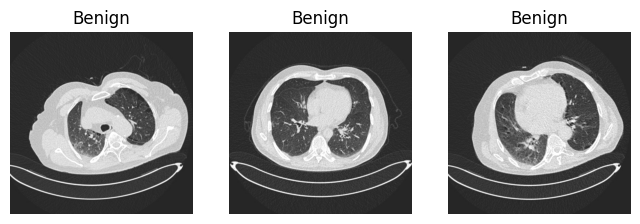

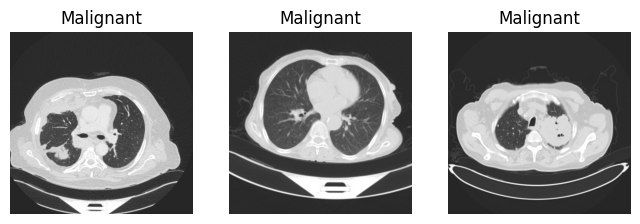

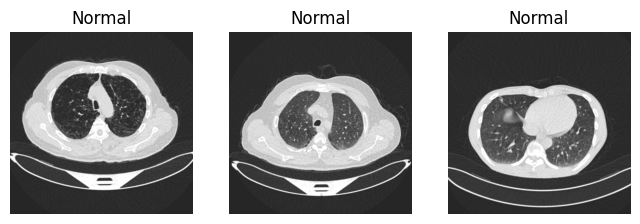

In [119]:
# Define the categories and their corresponding image paths
categories = {
    "Benign": benign_dir,
    "Malignant": malignant_dir,
    "Normal": normal_dir
}

# Iterate over categories
for category, image_dir in categories.items():
    # Load images from the directory
    image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir) if filename.endswith(('.jpg', '.png'))]
    
    # Create subplots for each category
    fig, ax = plt.subplots(1, 3, figsize=(8, 8))
    ax = ax.ravel()
    
    # Randomly sample 3 images from each category
    for i, img_path in enumerate(np.random.choice(image_paths, size=3, replace=False)):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct display
        ax[i].imshow(img)
        ax[i].axis("off")
        ax[i].set_title(category)
    
    plt.show()

In [120]:
# Create a DataFrame with the counts of each category
count_data = pd.DataFrame({
    "label": ["Benign", "Malignant", "Normal"],
    "count": [len(benign_images), len(malignant_images), len(normal_images)]
})

# Create histogram using Plotly Express
fig = px.histogram(data_frame=count_data, x="label", y="count", color="label")

# Show the histogram
fig.show()

# CNN Model

In [121]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # 3 output classes: benign, malignant, normal


c:\Users\Azam\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [122]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,939,779 (49.36 MB)

 Trainable params: 12,939,779 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

In [123]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

y_train_encoded = to_categorical(y_train, num_classes=3)
y_test_encoded = to_categorical(y_test, num_classes=3)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train_encoded:", y_train_encoded.shape)

print("Shape of X_test:", X_test.shape)
print("Shape of y_test_encoded:", y_test_encoded.shape)

Shape of X_train: (877, 128, 128)
Shape of y_train_encoded: (877, 3)
Shape of X_test: (220, 128, 128)
Shape of y_test_encoded: (220, 3)


In [124]:
history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

print("Training history:", history.history)

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 316ms/step - accuracy: 0.4574 - loss: 154.9908 - val_accuracy: 0.6023 - val_loss: 0.7495
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 323ms/step - accuracy: 0.7016 - loss: 0.6675 - val_accuracy: 0.8352 - val_loss: 0.3814
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 322ms/step - accuracy: 0.8639 - loss: 0.3432 - val_accuracy: 0.9432 - val_loss: 0.2310
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 315ms/step - accuracy: 0.9486 - loss: 0.1720 - val_accuracy: 0.9659 - val_loss: 0.1269
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 320ms/step - accuracy: 0.9894 - loss: 0.0634 - val_accuracy: 0.9375 - val_loss: 0.2677
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 320ms/step - accuracy: 0.9717 - loss: 0.0803 - val_accuracy: 0.9489 - val_loss: 0.1717
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 321ms/step - accuracy: 0.9847 - loss: 0.0398 - val_accuracy: 0.9602 - val_loss: 0.1056
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 324ms/step - accuracy: 0.9857 - loss: 0.0544 - val_accuracy: 

In [125]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

def history_plot(history):
    epochs = len(history.history['accuracy'])
    fig1 = make_subplots()
    fig1.add_trace(go.Scatter(x=np.arange(1, epochs + 1), y=history.history["accuracy"], name="Training Accuracy"))
    fig1.add_trace(go.Scatter(x=np.arange(1, epochs + 1), y=history.history["val_accuracy"], name="Validation Accuracy"))
    fig1.update_layout(title="Training and Validation Accuracy", xaxis_title="Epoch", yaxis_title="Accuracy")
    fig1.show()

    fig2 = make_subplots()
    fig2.add_trace(go.Scatter(x=np.arange(1, epochs + 1), y=history.history["loss"], name="Training Loss"))
    fig2.add_trace(go.Scatter(x=np.arange(1, epochs + 1), y=history.history["val_loss"], name="Validation Loss"))
    fig2.update_layout(title="Training and Validation Loss", xaxis_title="Epoch", yaxis_title="Loss")
    fig2.show()

history_plot(history)

In [126]:
# Check Train Accuracy and Loss
y_train_encoded = to_categorical(y_train, num_classes=3)

train_loss, train_acc = model.evaluate(X_train, y_train_encoded)
print(f'Test Loss: {train_loss}')
print(f'Test Accuracy: {train_acc}')

28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.9986 - loss: 0.0071
Test Loss: 0.023859206587076187
Test Accuracy: 0.9942987561225891


In [127]:
# Check Test Accuracy and Loss

y_test_encoded = to_categorical(y_test, num_classes=3)

test_loss, test_acc = model.evaluate(X_test, y_test_encoded)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9959 - loss: 0.0314
Test Loss: 0.07527440041303635
Test Accuracy: 0.9863636493682861


In [128]:
X = np.array(images)
y = np.array(labels)

X_flat = X.reshape(X.shape[0], -1)

X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Test Accuracy:", accuracy)

Test Accuracy: 0.9363636363636364


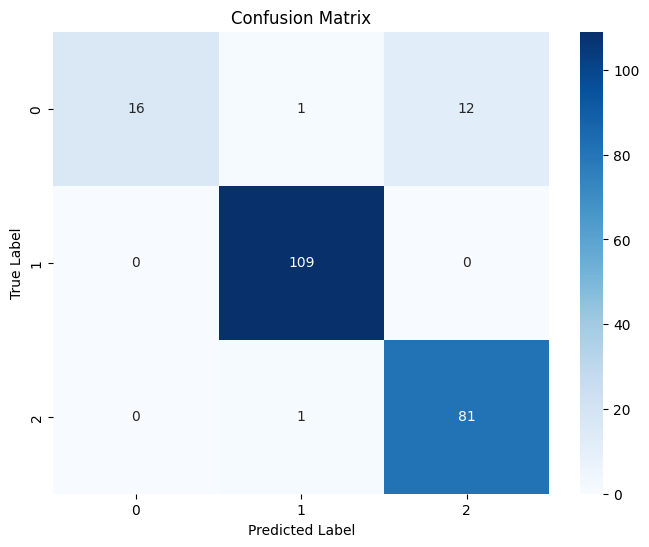

In [129]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_test)  # Assuming y_test is your true labels

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# SVM

In [130]:
X, y = make_classification(n_samples=1200, n_features=20, n_classes=3, n_clusters_per_class=1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

np.random.seed(42)
noise_indices = np.random.choice(len(y_train), size=int(0.2 * len(y_train)), replace=False)
y_train[noise_indices] = np.random.randint(0, 3, size=len(noise_indices))  # Randomly assign new labels

svm_classifier = SVC(kernel='linear')

svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)

print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.925


In [140]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [142]:
from keras_preprocessing import image

In [146]:
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(128,128,1))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    pred = model.predict(images, batch_size=32)
    print("Actual: "+(image_path.split("/")[-1]).split("_")[0])
    print("Predicted: "+categories[np.argmax(pred)])

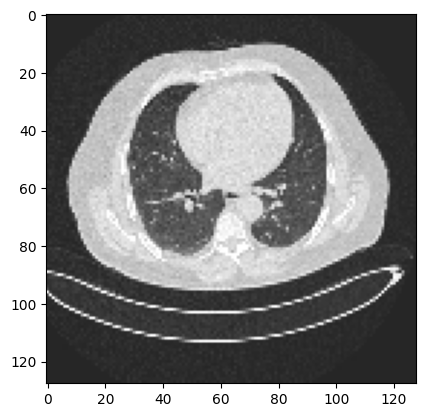

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "conv2d_30" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (1, 128, 128, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 128, 128, 3), dtype=float32)
  • training=False
  • mask=None

In [147]:
predict_image("./datasets/Test cases/Bengin case (23).jpg")